https://rosettacode.org/wiki/Voronoi_diagram

在平面上，绘制沃罗诺伊图的过程，只要将胞点连起来构成许多三角形，利用中垂线找外心，再将所有外心相连即可。

In [6]:
from PIL import Image
import random
import math
 
def generate_voronoi_diagram(width, height, num_cells):
    image = Image.new("RGB", (width, height))
    putpixel = image.putpixel
    imgx, imgy = image.size
    nx = []
    ny = []
    
    nr = []
    ng = []
    nb = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
        
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            putpixel((x, y), (nr[j], ng[j], nb[j]))
    image.save("VoronoiDiagram.png", "PNG")
    image.show()

generate_voronoi_diagram(500, 500, 25)

# scipy.spatial.Voronoi
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html

In [8]:
import numpy as np
from scipy.spatial import Voronoi

seed = np.array([[ 17.746   ,  -0.37283 ,  -0.75523 ],
       [  6.1704  ,   1.3404  ,   7.0341  ],
       [ -7.7211  ,   5.4282  ,   4.5016  ],
       [  5.8014  ,   2.1252  ,  -6.2491  ],
       [-16.047   ,  -2.8472  ,  -0.024795],
       [ -2.2967  ,  -6.7334  ,   0.60707 ]])
vor = Voronoi(seed)

In [9]:
vor.vertices

array([[ -6.93864391,   1.79801934,  -7.78610533],
       [-15.9902125 , -20.80310202,  50.1840397 ],
       [ 29.501584  , 106.36899584,   5.92137852],
       [  8.68156407,  -6.58985621,  -0.17410448],
       [ -0.20266123,   2.12100225,   0.58735065]])

In [10]:
vor.regions

[[],
 [-1, 0, 2, 3, 4],
 [-1, 2, 3],
 [-1, 0, 1],
 [-1, 0, 1, 2, 4],
 [-1, 1, 2, 3, 4],
 [-1, 0, 1, 3, 4]]

In [13]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                    [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)

The Voronoi vertices

In [19]:
vor.vertices

array([[0.5, 0.5],
       [0.5, 1.5],
       [1.5, 0.5],
       [1.5, 1.5]])

There is a single finite Voronoi region, and four finite Voronoi ridges:

In [20]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [0, 1, 3, 2],
 [2, -1, 0],
 [3, -1, 1]]

In [18]:
vor.ridge_vertices

[[-1, 0],
 [-1, 0],
 [-1, 1],
 [-1, 1],
 [0, 1],
 [-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 3],
 [-1, 2],
 [1, 3],
 [0, 2]]

The ridges are perpendicular between lines drawn between the following input points:

In [21]:
vor.ridge_points

array([[0, 3],
       [0, 1],
       [2, 5],
       [2, 1],
       [1, 4],
       [7, 8],
       [7, 6],
       [7, 4],
       [8, 5],
       [6, 3],
       [4, 5],
       [4, 3]], dtype=int32)

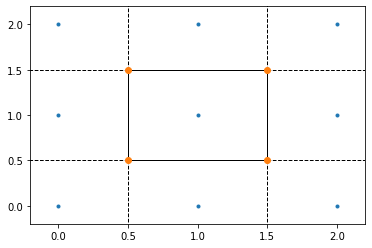

In [16]:
import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()